In [1]:
# impprting required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

In [2]:
upload = files.upload()

Saving sales_data_with_discounts.csv to sales_data_with_discounts.csv


In [3]:
sales = pd.read_csv('sales_data_with_discounts.csv')

In [ ]:
# Getting an initial sense of the dataset using below methods
sales.head(10)
sales.tail(10)
sales.columns
sales.index
sales.info()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
5,01-04-2021,Thursday,M06,C,3,Mobiles,RealU,RU-9,8100,24300,16.996489,4130.146805,20169.853195
6,01-04-2021,Thursday,M07,C,3,Mobiles,Sumsang,S-20,49100,147300,9.228812,13594.039719,133705.960281
7,01-04-2021,Thursday,M08,C,2,Mobiles,Sumsang,S-21,54100,108200,5.553719,6009.124321,102190.875679
8,01-04-2021,Thursday,M09,C,2,Mobiles,Orange,O-10,55100,110200,7.410104,8165.935144,102034.064856
9,01-04-2021,Thursday,M10,C,3,Mobiles,Orange,O-11,60100,180300,9.928444,17900.983733,162399.016267


Initial observations of the dataset:

The dataset contains 450 records and 13 columns. SKU level daily sales data with discount rates available for a total of 15 days. A few categorical variables present such as Day, SKU, Brand, Model etc. Numerical variables like Avg product price per SKU, Discount rate etc, are also present.

In [ ]:
# calculating quick statistical measures using describe() method

sales.describe()


,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


Observations and inferences of statistical results:

1.  Main observation would be that there seems to be a lot of difference between SKUs in terms of volume and sales. The maximum sales of a SKU is Rs. 179507 while the minimum sales generated was merely Rs. 326
2. The mean and median values are significantly different from each other suggesting the presence of outliers. For example, mean Total sales value is Rs. 33,812 while the median total sales value is Rs. 5700
3. The standard deviation of 'Discount rate' is 4.2 and the minimum rate is just 5%. This variation in Discount rate could be explained by the varied product mix of the company. Mobiles, lifestyle products and FMCG may be sold at varying discount rates.
`




In [ ]:
# exploring the categorical variables further

sales['SKU'].nunique() # 30 unique SKUs in total
len(sales['Model'].unique()) # 30 unique models
sales['BU'].unique() # Mobiles, FMCG and Lifestyle are the 3 Business Units (BU)
sales['Brand'].unique() # 9 brands

array(['RealU', 'YouM', 'Sumsang', 'Orange', 'Babaji', 'Vedic', 'Gear',
       'Jeera', 'Viva'], dtype=object)

In [ ]:
sales.groupby(by = 'BU')[['Total Sales Value', 'Net Sales Value']].sum().sort_values(by = 'Net Sales Value', ascending = False)

,Total Sales Value,Net Sales Value
BU,,
Mobiles,13920100,1.264023e+07
Lifestyle,898469,7.419696e+05
FMCG,397207,3.276562e+05


Interquartile range (IQR) calculation per BU unit

In [ ]:
# calculating Inter Quartile range (IQR) for Mobiles BU for Net Sales Value

sales[sales['BU'] == 'Mobiles'].describe()

Q1_Mob = sales[sales['BU'] == 'Mobiles'].describe().loc['25%', 'Net Sales Value']
Q3_Mob = sales[sales['BU'] == 'Mobiles'].describe().loc['75%', 'Net Sales Value']

IQR_Mob = Q3_Mob - Q1_Mob
print('IQR for Mobiles BU for Net Sales Value is', IQR_Mob)

IQR for Mobiles BU for Net Sales Value is 64699.37219082547


In [ ]:
# calculating Inter Quartile range (IQR) for FMCG BU for Net Sales Value

sales[sales['BU'] == 'FMCG'].describe()

Q1_FMCG = sales[sales['BU'] == 'FMCG'].describe().loc['25%', 'Net Sales Value']
Q3_FMCG = sales[sales['BU'] == 'FMCG'].describe().loc['75%', 'Net Sales Value']

IQR_FMCG = Q3_FMCG - Q1_FMCG
print('IQR for FMCG BU for Net Sales Value is', IQR_FMCG)

IQR for FMCG BU for Net Sales Value is 1773.2065469312286


In [ ]:
# calculating Inter Quartile range (IQR) for FMCG BU for Net Sales Value

sales[sales['BU'] == 'Lifestyle'].describe()

Q1_ls = sales[sales['BU'] == 'Lifestyle'].describe().loc['25%', 'Net Sales Value']
Q3_ls = sales[sales['BU'] == 'Lifestyle'].describe().loc['75%', 'Net Sales Value']

IQR_ls = Q3_ls - Q1_ls
print('IQR for FMCG BU for Net Sales Value is', IQR_ls)

IQR for FMCG BU for Net Sales Value is 2295.8396718209087


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Mobiles driving bulk of Revenue')

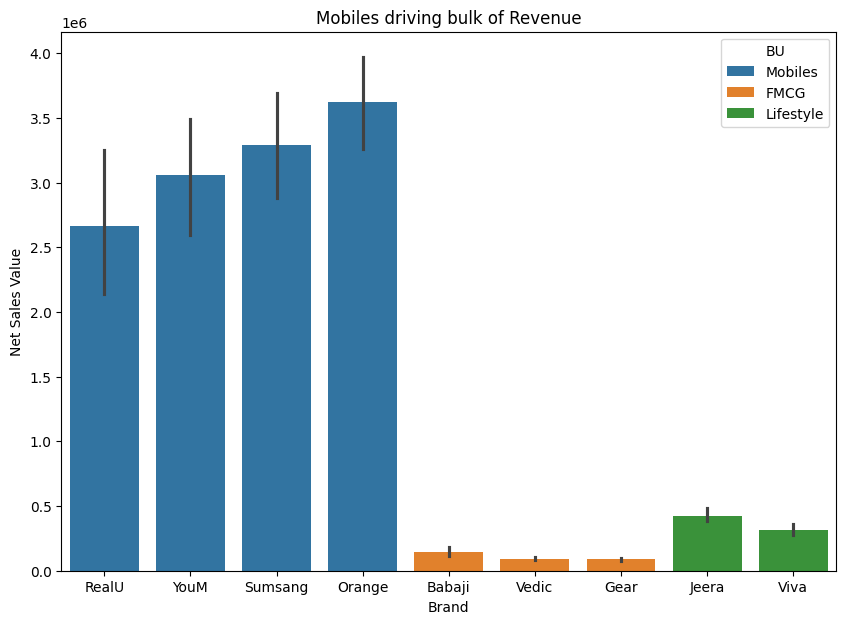

In [ ]:
plt.figure(figsize = (10,7))
sns.barplot(data = sales, x = 'Brand', y = 'Net Sales Value', estimator = 'sum', hue = 'BU')
plt.title('Mobiles driving bulk of Revenue')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

Text(0.5, 1.0, 'S-20 is the most popular Mobile Model')

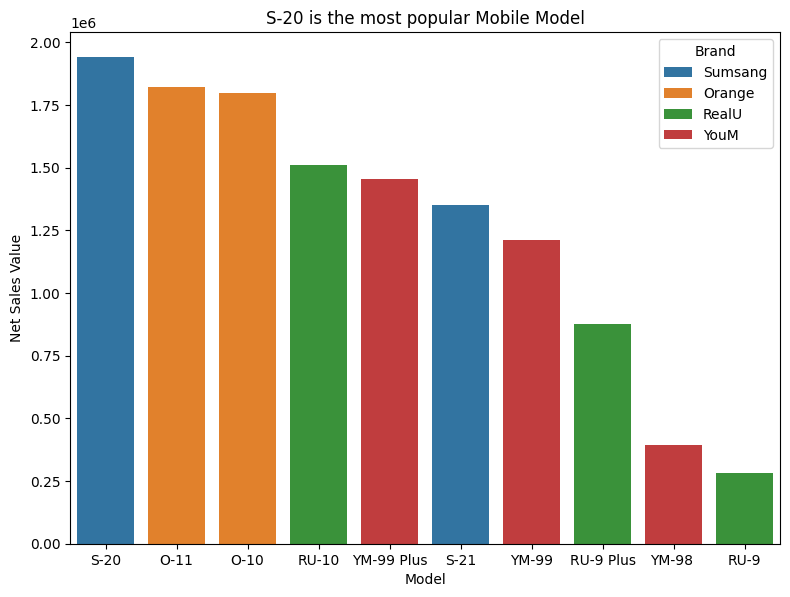

In [47]:
# Mobile Models analysis

sales.head()

sales_Mob = sales[sales['BU'] == 'Mobiles']
Model_Sales = sales_Mob.groupby(by = ['Model','Brand'])[['Net Sales Value','Avg Price']].sum().sort_values(by = 'Net Sales Value',ascending=False)

Model_Sales
type(Model_Sales)

plt.figure(figsize = (8,6))
sns.barplot(data = Model_Sales, x = 'Model', y = 'Net Sales Value',hue = 'Brand')
plt.tight_layout()
plt.title('S-20 is the most popular Mobile Model')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'FMCG & Lifestyle products come with higher discount rate')

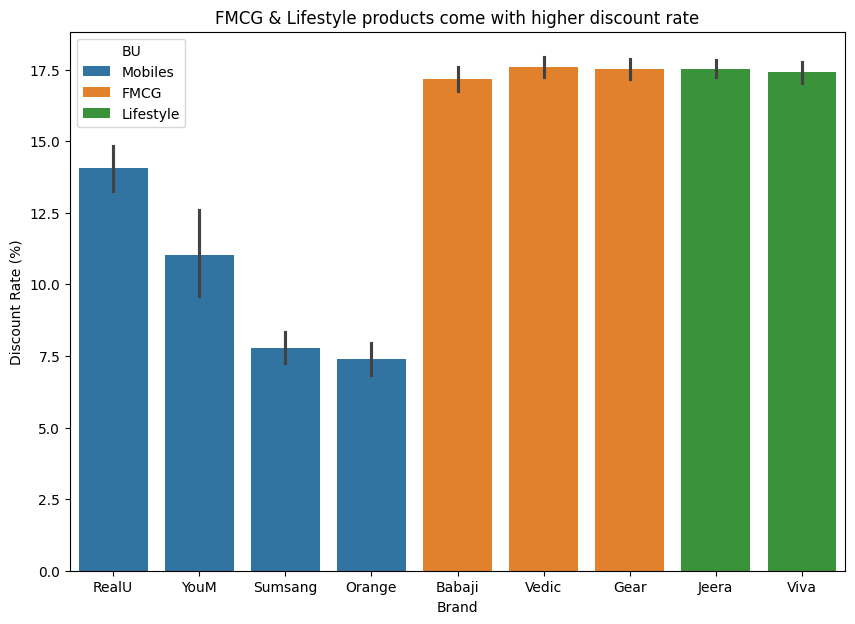

In [ ]:
plt.figure(figsize = (10,7))
sns.barplot(data = sales, x = 'Brand', y = 'Discount Rate (%)', hue = 'BU')
plt.title('FMCG & Lifestyle products come with higher discount rate')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'SKUs are seggregated by Business Units')

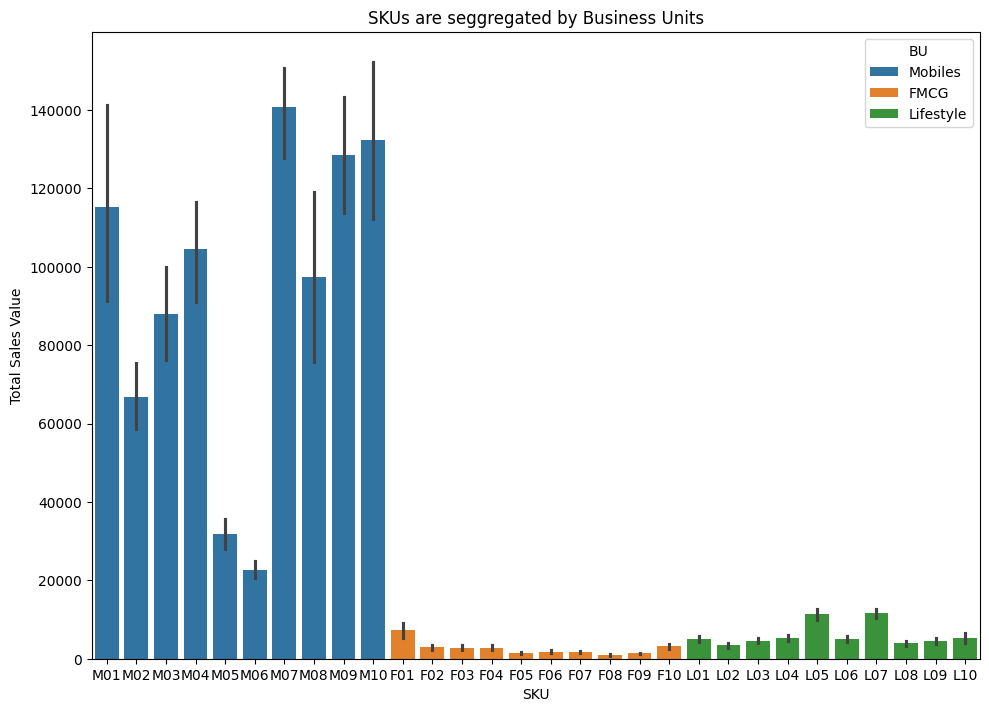

In [ ]:
# SKU, BU and sales chart

plt.figure(figsize = (10,7))
sns.barplot(data = sales, x = 'SKU', y = 'Total Sales Value', hue = 'BU')
plt.tight_layout()
plt.title('SKUs are seggregated by Business Units',size = 12)

Text(0.5, 1.0, 'Distribution of Net Sales')

<Figure size 1000x600 with 0 Axes>

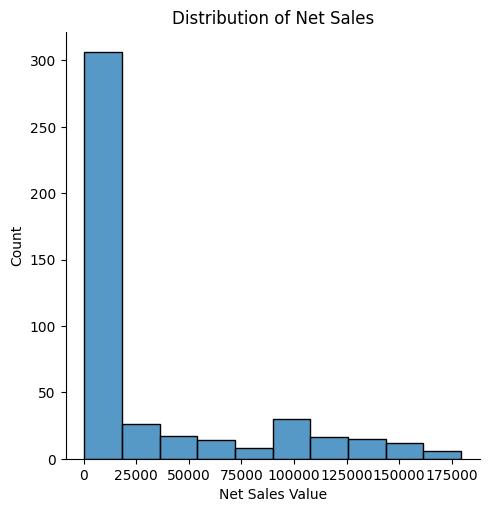

In [57]:
# Visualising the dataset to explore further

sales.head()

plt.figure(figsize = (10,6))
sns.displot(data = sales, x = 'Net Sales Value',bins = 10)
plt.tight_layout()
plt.title('Distribution of Net Sales')

# Approximately 300 SKUs with a Net sales less than Rs. 15,000
# Right skewed distribution is observed for numerical variables related to sales such as Gross and Net sales, Avg price.

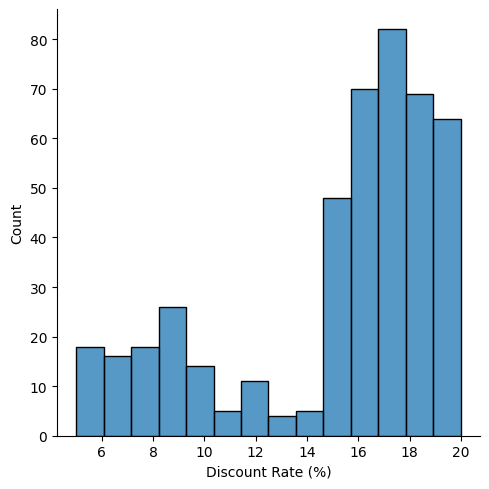

In [ ]:
sns.displot(data = sales, x = 'Discount Rate (%)')

# Majority SKUs have been providing a discount rate more than 15%
# slightly left skewed distribution observed in the case of Discount rate (%) suggesting more SKUs providing a higher Discount rate,


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='BU', ylabel='Net Sales Value'>

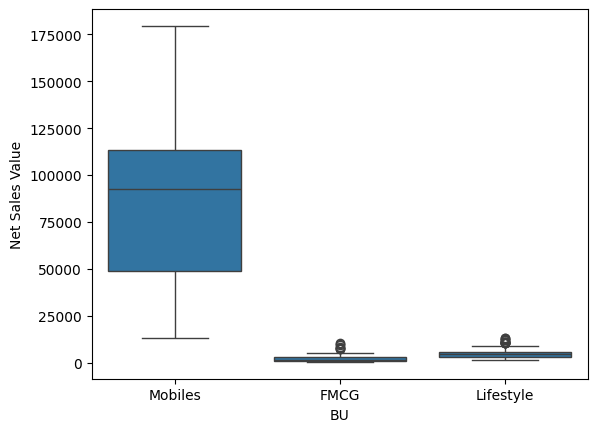

In [ ]:
# boxplot

sns.boxplot(data = sales, x = 'BU', y = 'Net Sales Value')

# Mobiles BU is clearly driving bulk of the revenue with Rs. 1.4 cr in revenue followed by Lifestyle BU with the Total sales of Rs. 9 lakhs.
# Median Net sales for Mobiles around Rs. 90,000



Concept and Need for One hot encoding:

1. One hot encoding is a technique used to convert categorical variables into numerical variables by assigning 0 0r 1 to the values in the categorical variable.

2. This technique is expecially useful in machine learning as most ML models do not work well with categorical columns. One hot encoding helps ML models performance by providing more information regarding categorical variables otherwise inaccessible by ML models.



In [ ]:
# converting categorical variables to dummy variables
# One hot encoding

sales.head()

# Since there are many different categories within variables such as Brand and Model. I will stick to BU, City and Day variables to display dummy variables

pd.get_dummies(sales[['Day', 'City', 'BU', 'Total Sales Value', 'Net Sales Value', 'Discount Rate (%)']], dtype = int)

sales.columns

,Total Sales Value,Net Sales Value,Discount Rate (%),Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,City_C,BU_FMCG,BU_Lifestyle,BU_Mobiles
0,181500,160346.501180,11.654820,0,0,0,0,1,0,0,1,0,0,1
1,101000,89323.897039,11.560498,0,0,0,0,1,0,0,1,0,0,1
2,112700,102042.089843,9.456886,0,0,0,0,1,0,0,1,0,0,1
3,120600,112235.925298,6.935385,0,0,0,0,1,0,0,1,0,0,1
4,24300,19927.053770,17.995663,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2600,2197.632127,15.475687,0,0,0,0,1,0,0,1,0,1,0
446,15600,12939.103758,17.057027,0,0,0,0,1,0,0,1,0,1,0
447,3200,2593.102394,18.965550,0,0,0,0,1,0,0,1,0,1,0
448,5700,4742.798174,16.793014,0,0,0,0,1,0,0,1,0,1,0


Standardisation of numerical variables using the Z score formula. (x - mean/std)

Data Standardisation is an important task during the data preprocessing stage. Standardisation is used when the range in the variables is too large or simply when the different variables contains different units. This process ensures that all variables have a mean of 0 and a standard deviation of 1. This is particularly important while considering ML models where certain features may influence the output greatly due to presence of large numbers.

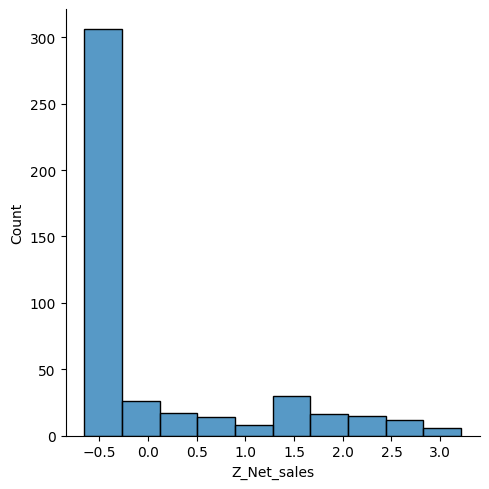

In [ ]:
mean_sales = sales['Net Sales Value'].mean()
std_sales = sales['Net Sales Value'].std()

print(mean_sales)
print(std_sales)

sales['Z_Net_sales'] = (sales['Net Sales Value'] - mean_sales) / std_sales
sales['Z_Net_sales']

sns.displot(sales['Z_Net_sales'],bins = 10)


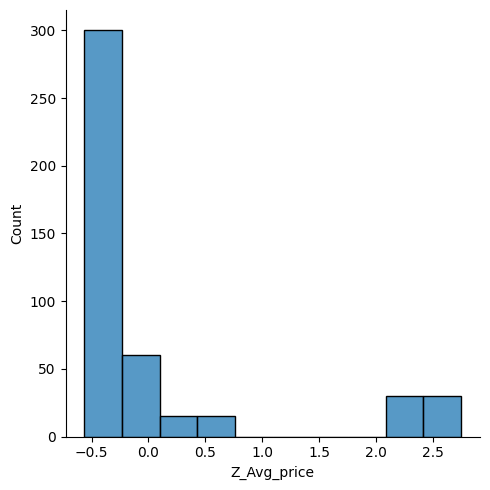

In [ ]:
sales['Z_Avg_price'] = (sales['Avg Price'] - sales['Avg Price'].mean()) / sales['Avg Price'].std()
sales['Z_Avg_price']

sns.displot(data = sales['Z_Avg_price'], bins = 10)

In [49]:
# Average Discount rate per BU

sales.groupby(by = 'BU')['Discount Rate (%)'].mean().sort_values(ascending = False)

,Discount Rate (%)
BU,
Lifestyle,17.470720
FMCG,17.432604
Mobiles,10.562401


In [56]:
# Day of week volume and Net sales analysis

sales.groupby(by = 'Day')[['Volume', 'Net Sales Value']].sum().sort_values(by = 'Volume', ascending = False)

sales.head(50)

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
5,01-04-2021,Thursday,M06,C,3,Mobiles,RealU,RU-9,8100,24300,16.996489,4130.146805,20169.853195
6,01-04-2021,Thursday,M07,C,3,Mobiles,Sumsang,S-20,49100,147300,9.228812,13594.039719,133705.960281
7,01-04-2021,Thursday,M08,C,2,Mobiles,Sumsang,S-21,54100,108200,5.553719,6009.124321,102190.875679
8,01-04-2021,Thursday,M09,C,2,Mobiles,Orange,O-10,55100,110200,7.410104,8165.935144,102034.064856
9,01-04-2021,Thursday,M10,C,3,Mobiles,Orange,O-11,60100,180300,9.928444,17900.983733,162399.016267


Conclusion:

1. Out of the 3 Business units, Mobiles, FMCG and Lifestyle, Mobiles contribute bulk of the revenue with around  Rs. 1.4 Cr. Greater than 90% of the revenue.
2. SKU are seggregated by BUs. Hence, SKUs holding Moblies are driving much more revenue than those holding Lifestyle or FMCG products.
3. In Mobiles, Orange and Sumsang brands are the most popular ones.
4. S-20 in Sumsang and O-10 & O-11 in Orange brands are the popular mobile models.
5. Average discount rate extended for Mobiles is 10.5% while it is 17.5% for both FMCG and Lifestyle.
6. Thursdays seem to be the most busy days with volumes reaching 436 units, while Mondays are slow with around 260 units.

